In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/ColabNotebooks/')

Mounted at /content/ColabNotebooks/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/content/ColabNotebooks/MyDrive/ProjetEpilepsy01.xlsx')

In [ ]:
df.head(10)

,Horodateur,Patient age,Gender,TRADES BY SECTOR,social class,Region,What is the type of epilepsy you have?,Do you have a family member who was diagnosed with epilepsy?,"If the answer is yes, what was the type of epilepsy he had?",What is/are the cause(s) of epilepsy seizures you had?,What is the treatment that was efficient in your case?,The Diagnosis that was applied(in your case) in order to detect the epilepsy,To which extent you think the treatment was efficient?,How was the impact of epilepsy on your personal life?,How was the impact of epilepsy on your professional life?
0,NaT,Adults (25-64 years),Male,Teaching,Middle class,East Africa,Focal,Yes,Generalized,Genetic conditions that result in brain injury...,Medication,EEG(electroencephalogram),less than 30%,It didn't affect my personal life in a remarka...,Bad impact but it was possible to deal with it
1,NaT,Adults (25-64 years),Male,Teaching,Middle class,Central Africa,Generalized,Yes,Generalized,Injury before birth,Medication,EEG(electroencephalogram),between 30% and 60%,It didn't affect my personal life in a remarka...,Bad impact but it was possible to deal with it
2,NaT,Youth (15-24 years),Female,Secretariat,Upper class,Central Africa,Focal,No,NaN,Low oxygen during birth,Medication,MEG(Magnetoencephalography),less than 30%,Very bad and determinant for my personal life,Bad impact but it was possible to deal with it
3,NaT,Adults (25-64 years),Male,Journalism,Upper class,East Asia,Generalized,Yes,Generalized,Injury before birth,Surgery,EEG(electroencephalogram),between 60% and 90%,Bad impact but it was possible to deal with it,It didnt affect my professional life in a rema...
4,NaT,Adults (25-64 years),Female,Industry,Middle class,North America,Focal,No,NaN,"Developmental disorders, such as autism and ne...",Medication,MRI(Magnetic Resonance Imaging),between 30% and 60%,Bad impact but it was possible to deal with it,It didnt affect my professional life in a rema...
5,NaT,Seniors (65 years and over),Female,Transport-Logistics,Middle class,Central Africa,Focal,No,NaN,Low oxygen during birth,Medication,MRI(Magnetic Resonance Imaging),between 30% and 60%,Bad impact but it was possible to deal with it,Very bad and determinant for my career
6,NaT,Youth (15-24 years),Female,"It, Telecoms, Web",Middle class,Central Europe,Focal,No,NaN,"Low oxygen during birth, Serious illness or ve...",Surgery,EEG(electroencephalogram),between 30% and 60%,Very bad and determinant for my personal life,Bad impact but it was possible to deal with it
7,NaT,Seniors (65 years and over),Male,"It, Telecoms, Web",Upper class,East Asia,Focal,Yes,Focal,Low oxygen during birth,Medication,MRI(Magnetic Resonance Imaging),between 60% and 90%,Bad impact but it was possible to deal with it,It didnt affect my professional life in a rema...
8,NaT,Adults (25-64 years),Female,"Audiovisual, Cinema",Lower class,North Africa,Generalized,No,NaN,"Brain tumors, Dementia/Alzheimer's disease, Ge...",Surgery,MRI(Magnetic Resonance Imaging),less than 30%,Very bad and determinant for my personal life,Very bad and determinant for my career
9,NaT,Youth (15-24 years),Female,"It, Telecoms, Web",Middle class,North Africa,Focal,Yes,Focal,"Low oxygen during birth, Genetic conditions th...",Medication,EEG(electroencephalogram),between 30% and 60%,Bad impact but it was possible to deal with it,It didnt affect my professional life in a rema...


In [ ]:
df.shape

(37, 15)

In [ ]:
df.columns

Index(['Horodateur', 'Patient age ', 'Gender', 'TRADES BY SECTOR',
       'social class', 'Region', 'What is the type of epilepsy you have?',
       'Do you have a family member who was diagnosed with epilepsy?',
       'If the answer is yes, what was the type of epilepsy he had?',
       'What is/are the cause(s) of epilepsy seizures you had?',
       'What is the treatment that was efficient in your case?',
       'The Diagnosis that was applied(in your case) in order to detect the epilepsy',
       'To which extent you think the treatment was efficient?',
       'How was the impact of epilepsy on your personal life?',
       'How was the impact of epilepsy on your professional life?'],
      dtype='object')

In [ ]:
df.nunique()

Horodateur                                                                      12
Patient age                                                                      4
Gender                                                                           2
TRADES BY SECTOR                                                                14
social class                                                                     3
Region                                                                          16
What is the type of epilepsy you have?                                           2
Do you have a family member who was diagnosed with epilepsy?                     2
If the answer is yes, what was the type of epilepsy he had?                      2
What is/are the cause(s) of epilepsy seizures you had?                          19
What is the treatment that was efficient in your case?                           3
The Diagnosis that was applied(in your case) in order to detect the epilepsy     3
To w

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 15 columns):
 #   Column                                                                        Non-Null Count  Dtype         
---  ------                                                                        --------------  -----         
 0   Horodateur                                                                    12 non-null     datetime64[ns]
 1   Patient age                                                                   37 non-null     object        
 2   Gender                                                                        37 non-null     object        
 3   TRADES BY SECTOR                                                              37 non-null     object        
 4   social class                                                                  37 non-null     object        
 5   Region                                                                        37 non-null     

In [ ]:
df.isnull().sum()

Horodateur                                                                      25
Patient age                                                                      0
Gender                                                                           0
TRADES BY SECTOR                                                                 0
social class                                                                     0
Region                                                                           0
What is the type of epilepsy you have?                                           0
Do you have a family member who was diagnosed with epilepsy?                     0
If the answer is yes, what was the type of epilepsy he had?                     19
What is/are the cause(s) of epilepsy seizures you had?                           0
What is the treatment that was efficient in your case?                           1
The Diagnosis that was applied(in your case) in order to detect the epilepsy     0
To w

In [ ]:
df.drop(columns=["Horodateur"],inplace=True)

In [ ]:
df.columns

Index(['Patient age ', 'Gender', 'TRADES BY SECTOR', 'social class', 'Region',
       'What is the type of epilepsy you have?',
       'Do you have a family member who was diagnosed with epilepsy?',
       'If the answer is yes, what was the type of epilepsy he had?',
       'What is/are the cause(s) of epilepsy seizures you had?',
       'What is the treatment that was efficient in your case?',
       'The Diagnosis that was applied(in your case) in order to detect the epilepsy',
       'To which extent you think the treatment was efficient?',
       'How was the impact of epilepsy on your personal life?',
       'How was the impact of epilepsy on your professional life?'],
      dtype='object')

In [ ]:
df1 =df.rename(columns = {'Do you have a family member who was diagnosed with epilepsy?':'family member','What is the type of epilepsy you have?':'Type','If the answer is yes, what was the type of epilepsy he had?':'member type','What is the treatment that was efficient in your case?':'treatment'})
df2=df1.rename(columns = {'The Diagnosis that was applied(in your case) in order to detect the epilepsy':'Diagnosis','To which extent you think the treatment was efficient?':'treatment efficient'})
df3=df2.rename(columns = {'What is/are the cause(s) of epilepsy seizures you had?':'seizures cause','How was the impact of epilepsy on your personal life?':'personal impact','How was the impact of epilepsy on your professional life?':'professional impact'})
df3.columns

Index(['Patient age ', 'Gender', 'TRADES BY SECTOR', 'social class', 'Region',
       'Type', 'family member', 'member type', 'seizures cause', 'treatment',
       'Diagnosis', 'treatment efficient', 'personal impact',
       'professional impact'],
      dtype='object')

In [ ]:
df3.isnull().sum()

Patient age             0
Gender                  0
TRADES BY SECTOR        0
social class            0
Region                  0
Type                    0
family member           0
member type            19
seizures cause          0
treatment               1
Diagnosis               0
treatment efficient     0
personal impact         0
professional impact     0
dtype: int64

In [ ]:
df3=df3.replace(" ",np.nan)

In [ ]:
df3["treatment"].value_counts()

Medication        23
Surgery           12
Ketogenic diet     1
Name: treatment, dtype: int64

In [ ]:
df3["Gender"].value_counts()

Female    22
Male      15
Name: Gender, dtype: int64

In [ ]:
df3["social class"].value_counts()

Middle class    14
Lower class     12
Upper class     11
Name: social class, dtype: int64

In [ ]:
df3["Patient age "].value_counts()

Youth (15-24 years)            14
Adults (25-64 years)           13
Seniors (65 years and over)     9
Children (00-14 years)          1
Name: Patient age , dtype: int64

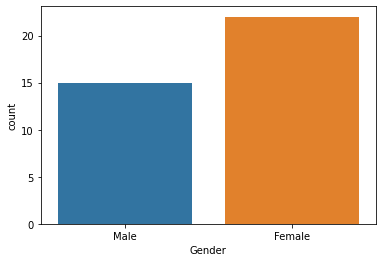

In [ ]:
sns.countplot(x=df3["Gender"])

In [ ]:
df3["Region"].value_counts()

North Africa           8
East Asia              7
Central Africa         4
East Africa            3
South Asia             2
West Africa            2
Central Europe         2
North America          1
Southern Africa        1
Northwestern Europe    1
Southeastern Europe    1
East-Central Europe    1
Southwestern Europe    1
Western Europe         1
South America          1
Northeastern Europe    1
Name: Region, dtype: int64

In [ ]:
df3.columns

Index(['Patient age ', 'Gender', 'TRADES BY SECTOR', 'social class', 'Region',
       'Type', 'family member', 'member type', 'seizures cause', 'treatment',
       'Diagnosis', 'treatment efficient', 'personal impact',
       'professional impact'],
      dtype='object')

In [ ]:
df3["seizures cause"].value_counts()

Low oxygen during birth                                                                                                                                                                                                                                                                 8
Injury before birth                                                                                                                                                                                                                                                                     3
Developmental disorders, such as autism and neurofibromatosis                                                                                                                                                                                                                           3
other(s)                                                                                                                                                  

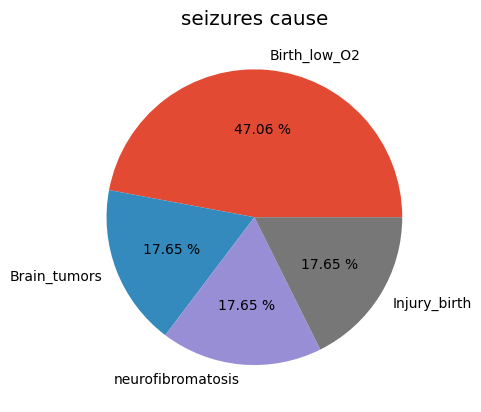

In [ ]:
Birth_low_O2=df3.loc[df3['seizures cause']=='Low oxygen during birth'].count()[0]
Brain_tumors=df3.loc[df3['seizures cause']=='Brain tumors'].count()[0]
neurofibromatosis=df3.loc[df3['seizures cause']=='Developmental disorders, such as autism and neurofibromatosis'].count()[0]
Injury_birth=df3.loc[df3['seizures cause']=='Injury before birth'].count()[0]

plt.style.use("ggplot")
labels=["Birth_low_O2","Brain_tumors","neurofibromatosis","Injury_birth"]
plt.pie([Birth_low_O2,Brain_tumors,neurofibromatosis,Injury_birth],labels =labels, autopct='%.2f %%')
plt.title('seizures cause')
plt.show()

In [ ]:
df3["TRADES BY SECTOR"].value_counts()
      

Transport-Logistics              6
Industry                         6
It, Telecoms, Web                6
Building, Public Works           4
Teaching                         2
Audiovisual, Cinema              2
Medical                          2
Fashion-Textile                  2
Banking, Insurance               2
Biology, Chemistry, Pharmacy     1
Secretariat                      1
Sport                            1
Audit, Accounting, Management    1
Journalism                       1
Name: TRADES BY SECTOR, dtype: int64

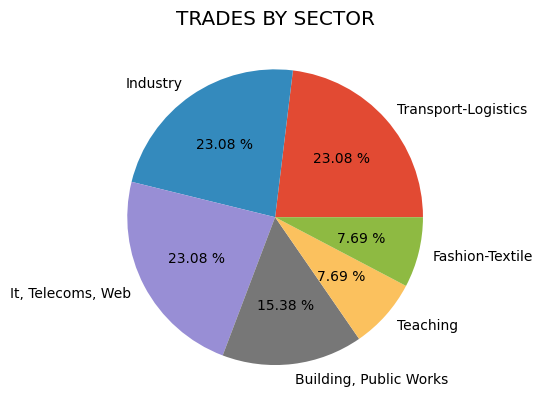

In [ ]:
Birth_low_O2=df3.loc[df3['TRADES BY SECTOR']=='Transport-Logistics'].count()[0]
Brain_tumors=df3.loc[df3['TRADES BY SECTOR']=='Industry'].count()[0]
neurofibromatosis=df3.loc[df3['TRADES BY SECTOR']=='It, Telecoms, Web'].count()[0]
Injury_birth=df3.loc[df3['TRADES BY SECTOR']=='Building, Public Works'].count()[0]
Injury_birth2=df3.loc[df3['TRADES BY SECTOR']=='Teaching'].count()[0]
Injury_birth3=df3.loc[df3['TRADES BY SECTOR']=='Fashion-Textile'].count()[0]
plt.style.use("ggplot")
labels=["Transport-Logistics","Industry","It, Telecoms, Web","Building, Public Works","Teaching","Fashion-Textile"]
plt.pie([Birth_low_O2,Brain_tumors,neurofibromatosis,Injury_birth,Injury_birth2,Injury_birth3],labels =labels, autopct='%.2f %%')
plt.title('TRADES BY SECTOR')
plt.show()

In [ ]:
df3["professional impact"].value_counts()

It didnt affect my professional life in a remarkable way    13
Very bad and determinant for my career                      13
Bad impact but it was possible to deal with it              11
Name: professional impact, dtype: int64

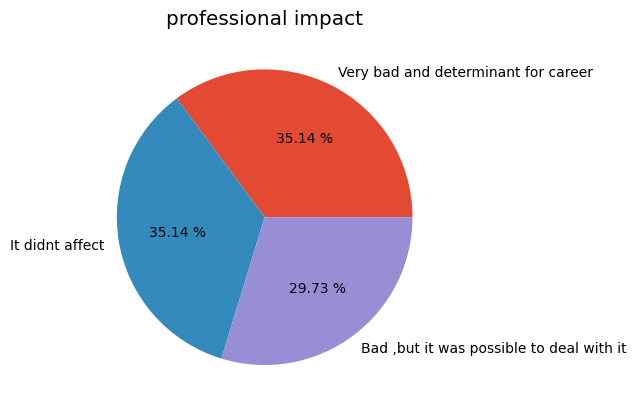

In [ ]:
Birth_low_O2=df3.loc[df3['professional impact']=='Very bad and determinant for my career'].count()[0]
Brain_tumors=df3.loc[df3['professional impact']=='It didnt affect my professional life in a remarkable way'].count()[0]
neurofibromatosis=df3.loc[df3['professional impact']=='Bad impact but it was possible to deal with it'].count()[0]

plt.style.use("ggplot")

labels=["Very bad and determinant for career","It didnt affect","Bad ,but it was possible to deal with it"]
plt.pie([Birth_low_O2,Brain_tumors,neurofibromatosis],labels =labels, autopct='%.2f %%')
plt.title('professional impact')
plt.show()

In [ ]:
df3["family member"].value_counts()

No     20
Yes    17
Name: family member, dtype: int64

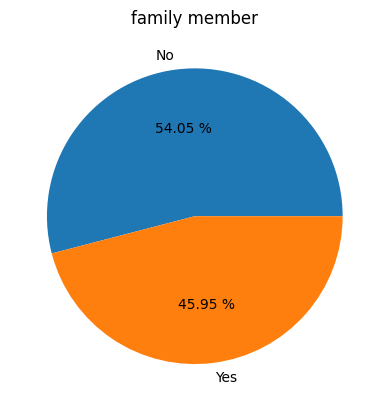

In [ ]:
Birth_low_O2=df3.loc[df3['family member']=='No'].count()[0]
Brain_tumors=df3.loc[df3['family member']=='Yes'].count()[0]


plt.style.use("default")

labels=["No","Yes"]
plt.pie([Birth_low_O2,Brain_tumors],labels =labels, autopct='%.2f %%')
plt.title('family member')
plt.show()

In [ ]:
df3["treatment efficient"].value_counts()

between 30% and 60%    20
less than 30%          12
between 60% and 90%     4
more than 90%           1
Name: treatment efficient, dtype: int64

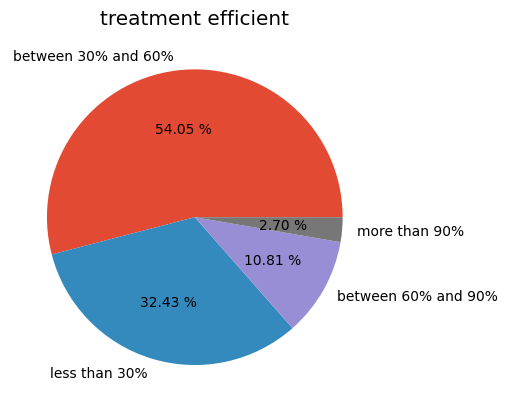

In [ ]:
Birth_low_O2=df3.loc[df3['treatment efficient']=='between 30% and 60%'].count()[0]
Brain_tumors=df3.loc[df3['treatment efficient']=='less than 30%'].count()[0]
neurofibromatosis=df3.loc[df3['treatment efficient']=='between 60% and 90%'].count()[0]
Injury_birth=df3.loc[df3['treatment efficient']=='more than 90%'].count()[0]

plt.style.use("ggplot")

labels=["between 30% and 60%","less than 30%","between 60% and 90%","more than 90%"]
plt.pie([Birth_low_O2,Brain_tumors,neurofibromatosis,Injury_birth],labels =labels, autopct='%.2f %%')
plt.title('treatment efficient')
plt.show()

In [ ]:
+